In [1]:
%reload_ext autoreload
%autoreload 2

import warnings

import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from bioinfokit.analys import stat
from matplotlib import pyplot as plt
from scipy import stats as st
from sklearn import decomposition, preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from scipy import stats

from utils import *

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

pd.set_option("display.max_columns", None)
warnings.filterwarnings('ignore')

# Import dataframe (.csv file) from working directory

In [2]:
# Import .csv file and convert into a pandas dataframe
df_products_cleaning = pd.read_csv("df_cleaned.csv", sep=",", encoding="utf-8", low_memory=False)

# Show
df_products_cleaning

,code,product_name,brands,countries,nutriscore_grade,energy-kcal_100g,proteins_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,fiber_100g,calcium_100g,magnesium_100g,potassium_100g,iron_100g,vitamin-a_100g,vitamin-d_100g,vitamin-b9_100g,vitamin-c_100g
0,0000000001199,Solène céréales poulet,CROUS,France,A,219.0,9.7,30.3,5.9,0.500000,1.7,0.464,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000000001281,Tarte noix de coco,"Crous Resto',Crous",France,d,381.0,4.6,27.3,22.0,15.500000,21.9,0.100,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000000001663,Crème dessert chocolat,Ferme De La Frémondière,France,B,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000000001885,Compote de poire,Crous,France,a,157.0,0.6,36.0,0.0,0.000000,27.0,0.000,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000000002264,Baguette Poitevin,Crous resto,France,B,207.0,8.9,27.5,6.7,3.800000,0.6,0.400,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311598,9996980313319,cup noodles,nissin,France,C,84.0,1.8,10.2,3.8,2.000000,0.5,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311599,9999200847366,Choco pearls,Cara,France,E,514.0,7.0,61.0,27.0,16.000000,50.0,0.240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311600,9999900002553,Chocolat de Couverture Noir,Barry,France,e,584.0,7.6,30.7,46.9,5.766667,26.9,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311601,9999900401301,Kabanos,Tarczynski,France,E,549.0,24.0,5.3,48.0,0.000000,1.9,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

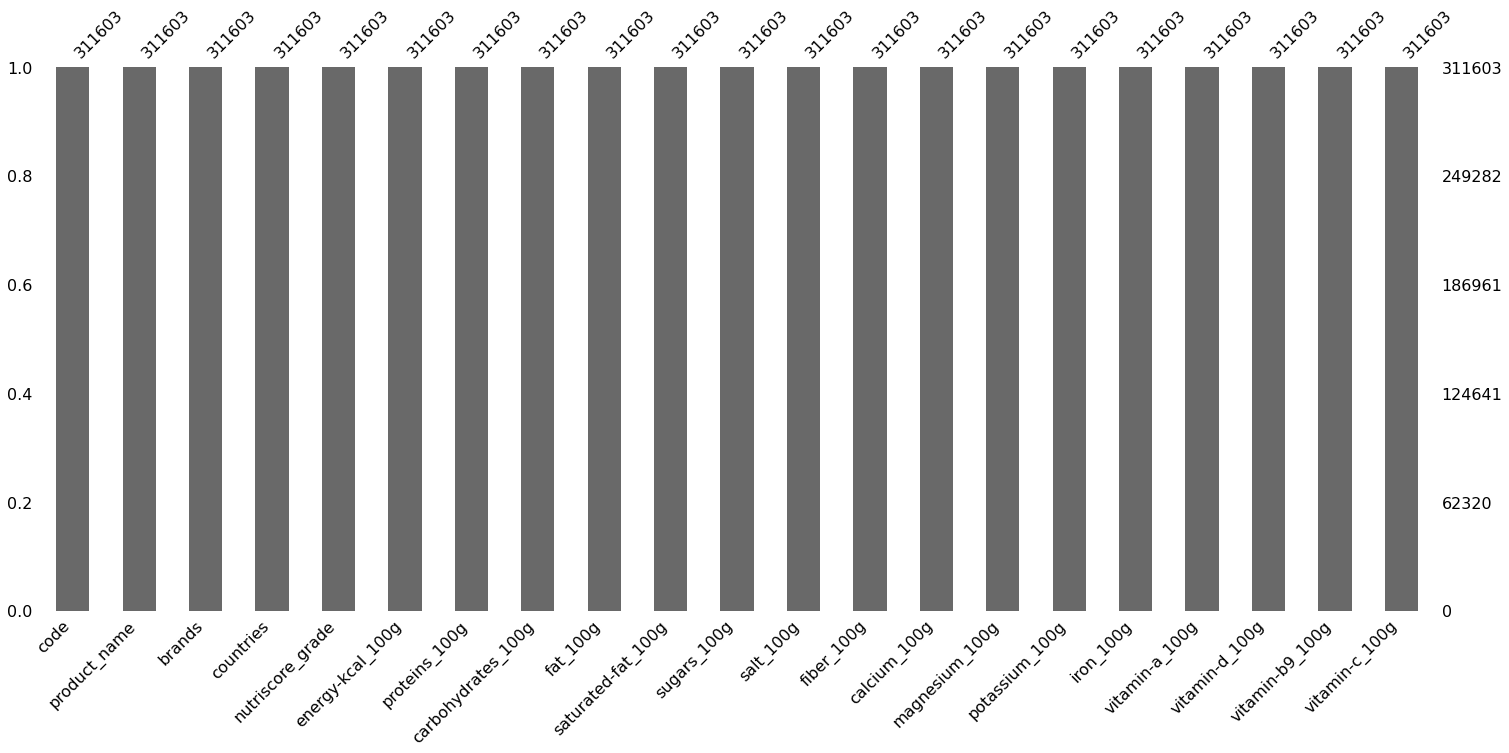

In [3]:
msno.bar(df_products_cleaning)

# Initial analysis

In [4]:
# Restructuring dataframe index with non-numerical variables
df_products_cleaning.set_index(['code','product_name','brands','countries','nutriscore_grade'], inplace = True)

# Show
df_products_cleaning.head()

,,,,,energy-kcal_100g,proteins_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,fiber_100g,calcium_100g,magnesium_100g,potassium_100g,iron_100g,vitamin-a_100g,vitamin-d_100g,vitamin-b9_100g,vitamin-c_100g
code,product_name,brands,countries,nutriscore_grade,,,,,,,,,,,,,,,,
0000000001199,Solène céréales poulet,CROUS,France,A,219.0,9.7,30.3,5.9,0.5,1.7,0.464,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000001281,Tarte noix de coco,"Crous Resto',Crous",France,d,381.0,4.6,27.3,22.0,15.5,21.9,0.100,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000001663,Crème dessert chocolat,Ferme De La Frémondière,France,B,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000001885,Compote de poire,Crous,France,a,157.0,0.6,36.0,0.0,0.0,27.0,0.000,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000002264,Baguette Poitevin,Crous resto,France,B,207.0,8.9,27.5,6.7,3.8,0.6,0.400,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Display types of variables
df_products_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 311603 entries, ('0000000001199', 'Solène céréales poulet', 'CROUS', 'France', 'A') to ('9999991149090', 'Riz parfumé', 'King Elephant', 'France', 'b')
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   energy-kcal_100g    311603 non-null  float64
 1   proteins_100g       311603 non-null  float64
 2   carbohydrates_100g  311603 non-null  float64
 3   fat_100g            311603 non-null  float64
 4   saturated-fat_100g  311603 non-null  float64
 5   sugars_100g         311603 non-null  float64
 6   salt_100g           311603 non-null  float64
 7   fiber_100g          311603 non-null  float64
 8   calcium_100g        311603 non-null  float64
 9   magnesium_100g      311603 non-null  float64
 10  potassium_100g      311603 non-null  float64
 11  iron_100g           311603 non-null  float64
 12  vitamin-a_100g      311603 non-null  float64
 13  vitamin-d_

In [6]:
# Display stats
df_products_cleaning.describe()

,energy-kcal_100g,proteins_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,fiber_100g,calcium_100g,magnesium_100g,potassium_100g,iron_100g,vitamin-a_100g,vitamin-d_100g,vitamin-b9_100g,vitamin-c_100g
count,311603.000000,311603.000000,311603.000000,311603.000000,311603.000000,311603.000000,311603.000000,311603.000000,311603.000000,311603.000000,311603.000000,311603.000000,3.116030e+05,3.116030e+05,3.116030e+05,311603.000000
mean,263.099984,6.907654,27.661351,11.076586,3.700662,10.721679,0.611675,0.766563,0.001898,0.000545,0.001484,0.000040,5.549043e-07,1.317847e-08,4.008248e-07,0.000138
std,183.294458,6.772036,27.833552,12.599411,4.771146,14.028061,0.686228,1.706809,0.018937,0.009179,0.026961,0.000507,1.211501e-05,2.946680e-07,8.154061e-06,0.001992
min,0.000000,0.000000,-0.500000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,100.000000,1.000000,3.100000,0.500000,0.100000,0.700000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,250.000000,5.400000,14.000000,5.800000,1.400000,3.500000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,394.000000,10.000000,53.000000,19.000000,5.800000,16.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
max,844.000000,26.020000,125.000000,51.610000,17.950000,51.050000,2.920000,9.300000,0.444000,0.322000,1.040000,0.014400,5.001000e-04,1.750000e-05,3.800000e-04,0.060000


<AxesSubplot:>

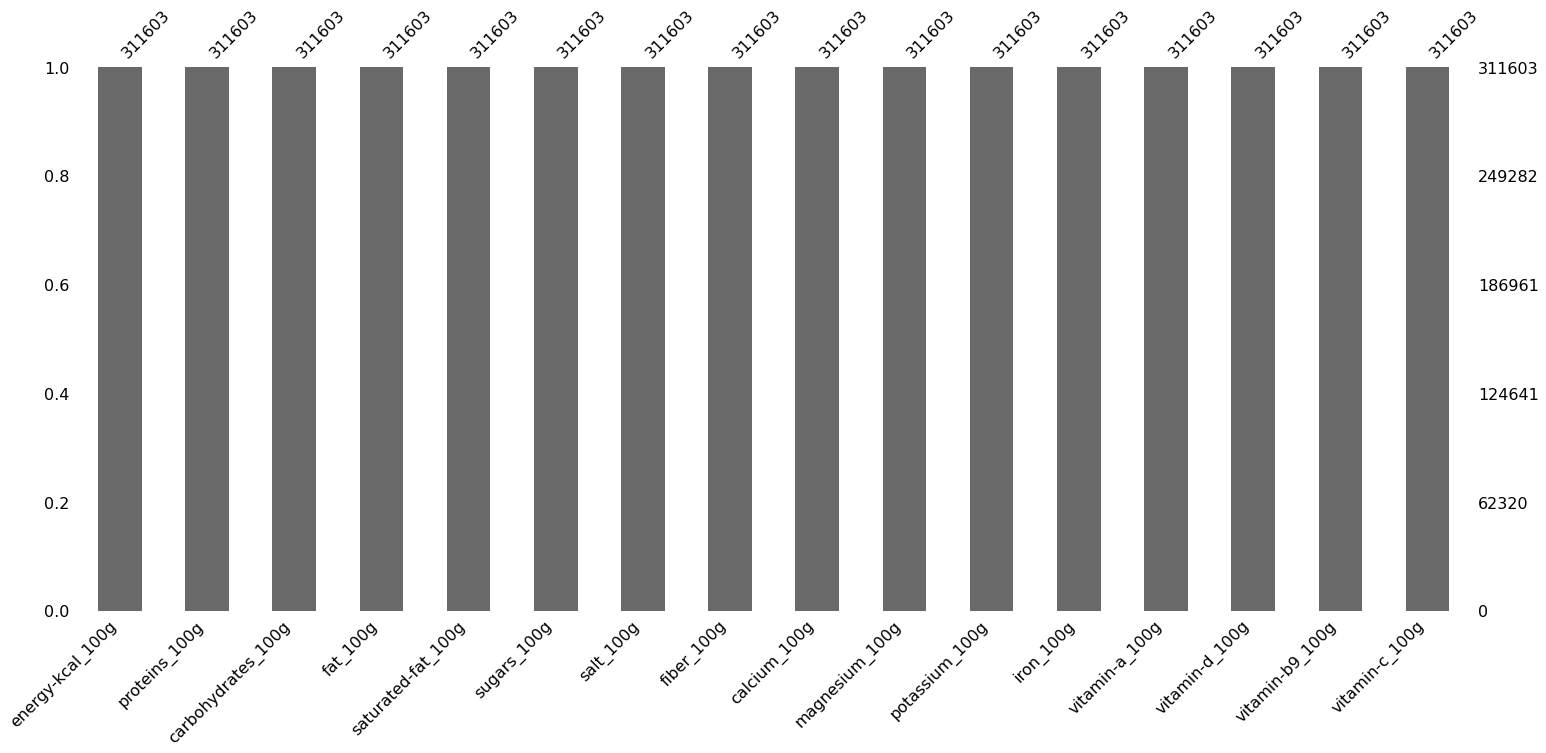

In [7]:
# Display missing data
msno.bar(df_products_cleaning)

In [8]:
#
columns_to_exclude = ['vitamin-a_100g',
                      'vitamin-d_100g',
                      'vitamin-b9_100g',
                      'vitamin-c_100g',
                      'calcium_100g',
                      'magnesium_100g',
                      'potassium_100g',
                      'iron_100g'
                     ]

#
df = (df_products_cleaning.drop(columns=columns_to_exclude)).copy()
1-df_products_cleaning.isna().mean().mean()

1.0

# Exploratory analysis

## 1. Univariate analysis 

### Plot 1 - Hist + kde

#### General

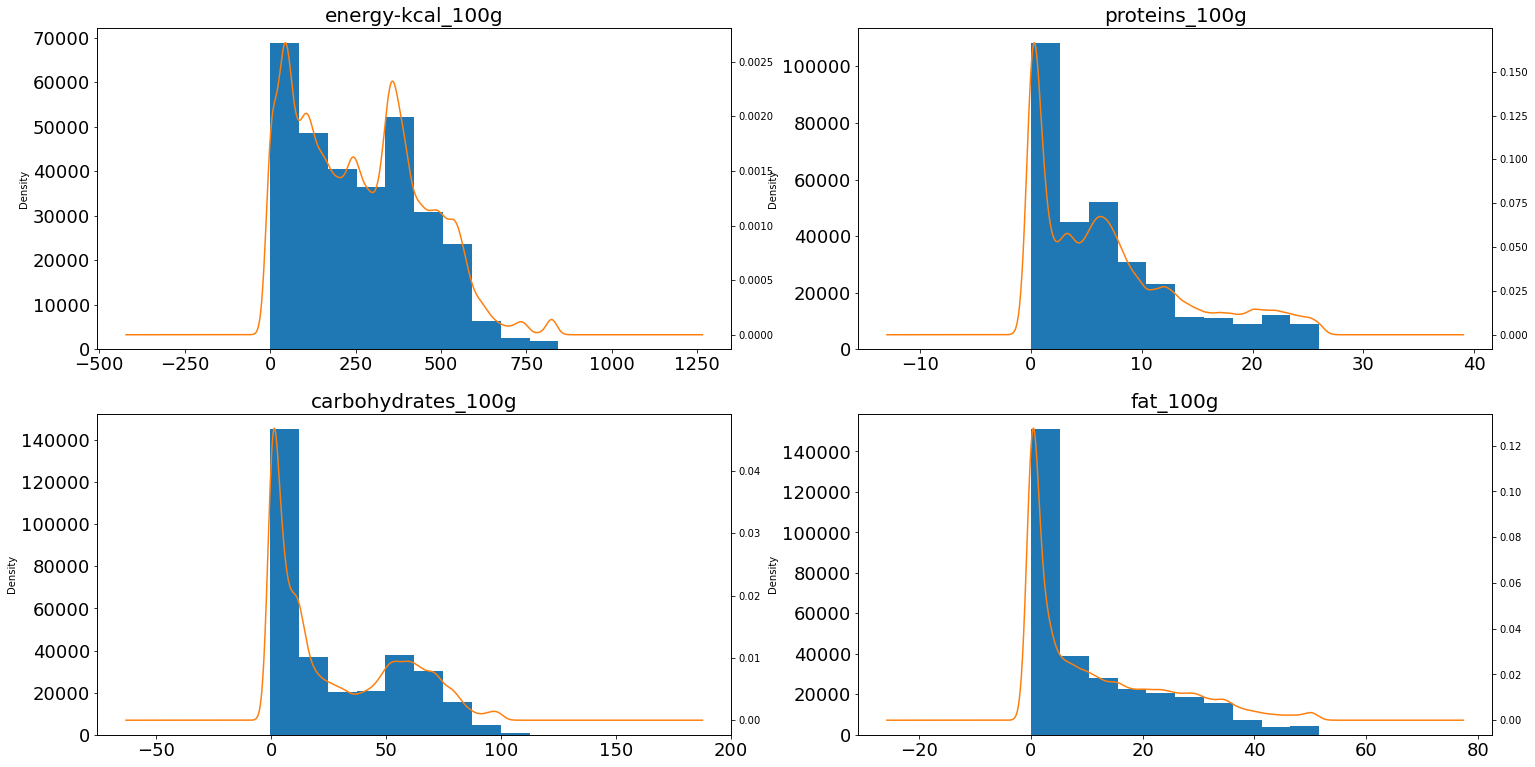

In [9]:
selected_columns=['energy-kcal_100g',
                  'proteins_100g',
                  'carbohydrates_100g',
                  'fat_100g',
                 ]

# Plot
plot_grid_hist_kde(2, 2, df_products_cleaning[selected_columns])

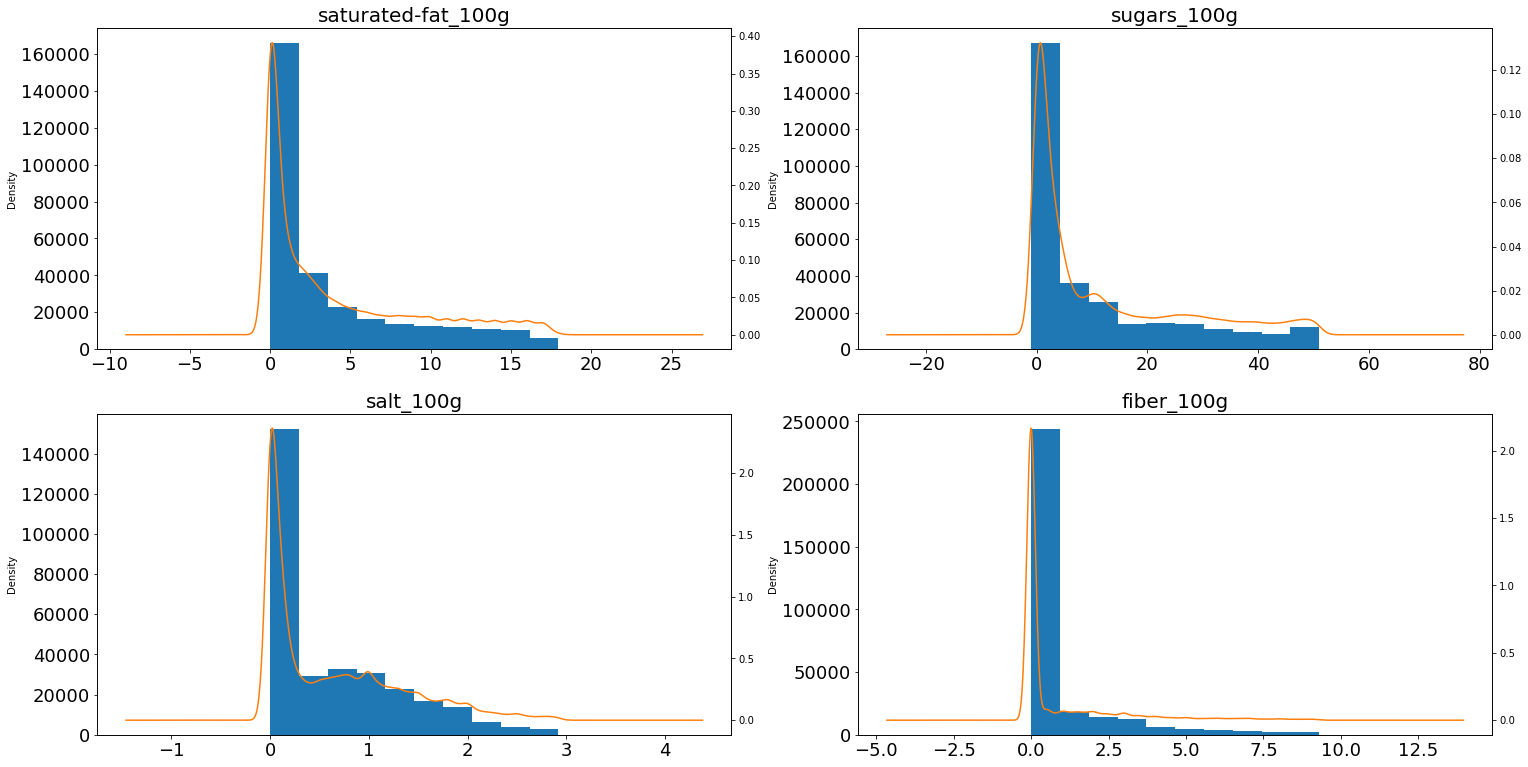

In [10]:
selected_columns=['saturated-fat_100g',
                  'sugars_100g',
                  'salt_100g',
                  'fiber_100g'
                 ]

# Plot
plot_grid_hist_kde(2, 2, df_products_cleaning[selected_columns])

### Plot 2 - Pie plot

#### nutriscore_grade

In [11]:
# Check daframe
df_products_cleaning

,,,,,energy-kcal_100g,proteins_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,fiber_100g,calcium_100g,magnesium_100g,potassium_100g,iron_100g,vitamin-a_100g,vitamin-d_100g,vitamin-b9_100g,vitamin-c_100g
code,product_name,brands,countries,nutriscore_grade,,,,,,,,,,,,,,,,
0000000001199,Solène céréales poulet,CROUS,France,A,219.0,9.7,30.3,5.9,0.500000,1.7,0.464,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000001281,Tarte noix de coco,"Crous Resto',Crous",France,d,381.0,4.6,27.3,22.0,15.500000,21.9,0.100,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000001663,Crème dessert chocolat,Ferme De La Frémondière,France,B,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000001885,Compote de poire,Crous,France,a,157.0,0.6,36.0,0.0,0.000000,27.0,0.000,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000002264,Baguette Poitevin,Crous resto,France,B,207.0,8.9,27.5,6.7,3.800000,0.6,0.400,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996980313319,cup noodles,nissin,France,C,84.0,1.8,10.2,3.8,2.000000,0.5,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999200847366,Choco pearls,Cara,France,E,514.0,7.0,61.0,27.0,16.000000,50.0,0.240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999900002553,Chocolat de Couverture Noir,Barry,France,e,584.0,7.6,30.7,46.9,5.766667,26.9,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Prepare dataframe for next plot
df_products_cleaning.reset_index(['nutriscore_grade'], inplace = True)
#
df_products_cleaning['nutriscore_grade'] = df_products_cleaning['nutriscore_grade'].apply(lambda x: x.upper())

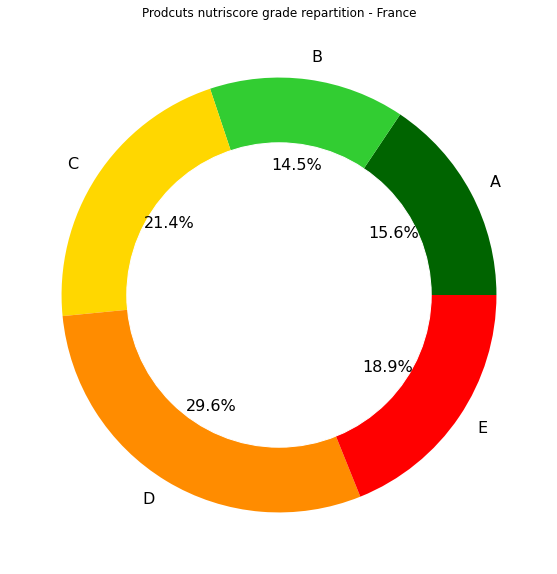

In [13]:
# Subplot
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('white')

# Plot
pie = df_products_cleaning.groupby('nutriscore_grade').size()
pie.plot(kind = "pie",          
         title = "Prodcuts nutriscore grade repartition - France",
         xlabel = "",
         ylabel= "",
         autopct = '%1.1f%%',
         colors = ["darkgreen","limegreen","gold","darkorange","red"],
         textprops={'fontsize': 16},
         ax = ax)

# Adding white circle for styling purposes
my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
# Restructuring dataframe index with non-numerical variables
df_products_cleaning.reset_index(['code','product_name','brands','countries'], inplace = True)
df_products_cleaning.set_index(['code','product_name','brands','countries','nutriscore_grade'], inplace = True)

## 2. Bivariate analysis

### Plot 1 - Diagonal correlation matrix

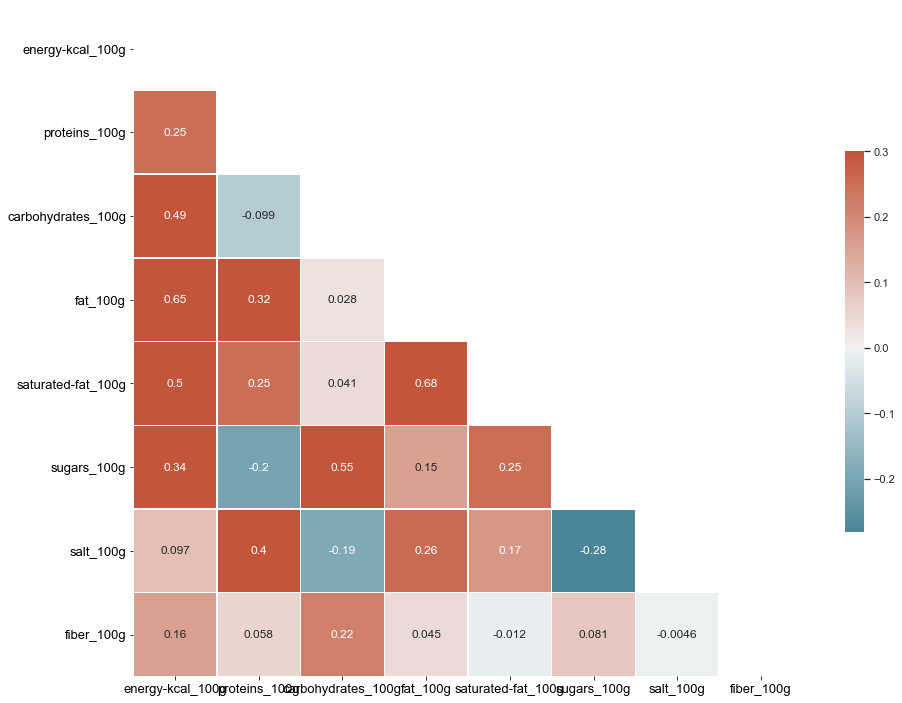

In [15]:
#
columns_to_exclude = ['vitamin-a_100g',
                      'vitamin-d_100g',
                      'vitamin-b9_100g',
                      'vitamin-c_100g',
                      'calcium_100g',
                      'magnesium_100g',
                      'potassium_100g',
                      'iron_100g'
                     ]

# Plot
dataframe_correlation_graph(df_products_cleaning.drop(columns=columns_to_exclude))


#### List of correlation pairs 

In [16]:
# Print ranking of the correlation pairs - Top 30
list_pairs = pairs_correlation_ranking(df_products_cleaning.drop(columns=columns_to_exclude))
print(type(list_pairs))

Pairs correlation ranking: 

fat_100g            saturated-fat_100g    0.682686
energy-kcal_100g    fat_100g              0.647521
carbohydrates_100g  sugars_100g           0.554459
energy-kcal_100g    saturated-fat_100g    0.498909
                    carbohydrates_100g    0.490908
proteins_100g       salt_100g             0.404900
energy-kcal_100g    sugars_100g           0.335222
proteins_100g       fat_100g              0.321404
sugars_100g         salt_100g             0.280798
fat_100g            salt_100g             0.255575
saturated-fat_100g  sugars_100g           0.252249
energy-kcal_100g    proteins_100g         0.248836
proteins_100g       saturated-fat_100g    0.248580
carbohydrates_100g  fiber_100g            0.219227
proteins_100g       sugars_100g           0.201591
carbohydrates_100g  salt_100g             0.189089
saturated-fat_100g  salt_100g             0.171951
energy-kcal_100g    fiber_100g            0.157241
fat_100g            sugars_100g           0.154048
pr

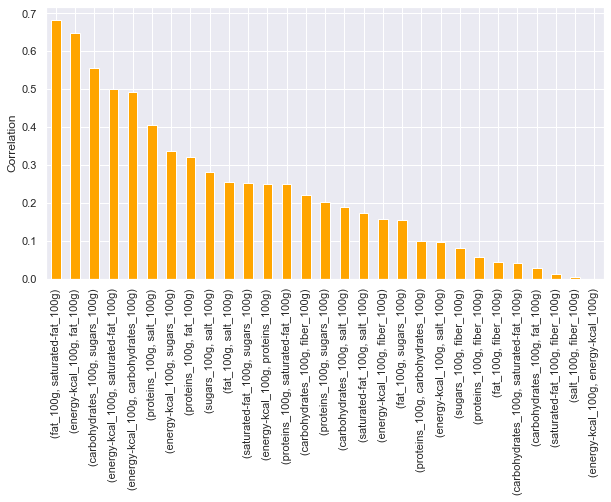

In [17]:
#
fig, ax = plt.subplots(figsize=(10,5))
ax = list_pairs.plot(kind="bar", color='orange')
#plt.title("Correlation coefficient evolution - descending")
plt.xlabel("")
plt.ylabel("Correlation")
plt.show()

### Plot 2 - Linear regression 

                            OLS Regression Results                            
Dep. Variable:               fat_100g   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     458.3
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           1.42e-72
Time:                        20:48:27   Log-Likelihood:                -1811.0
No. Observations:                 500   AIC:                             3626.
Df Residuals:                     498   BIC:                             3635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
saturated-fat_100g     1.8593      0

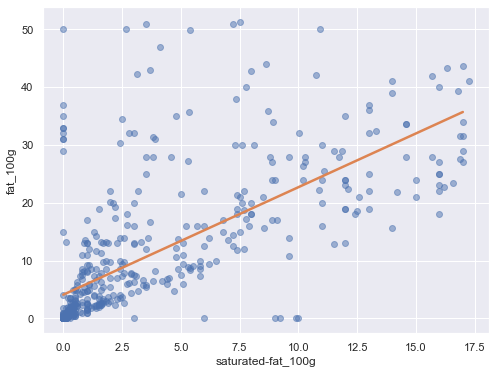

                            OLS Regression Results                            
Dep. Variable:       energy-kcal_100g   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     369.4
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           5.33e-62
Time:                        20:48:28   Log-Likelihood:                -3179.8
No. Observations:                 500   AIC:                             6364.
Df Residuals:                     498   BIC:                             6372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fat_100g       9.3852      0.488     19.221      0.0

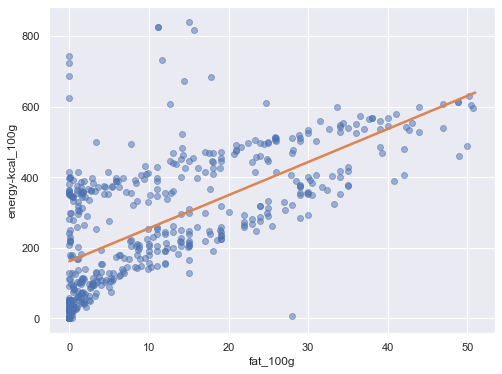

                            OLS Regression Results                            
Dep. Variable:     carbohydrates_100g   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     265.2
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           4.06e-48
Time:                        20:48:28   Log-Likelihood:                -2269.6
No. Observations:                 500   AIC:                             4543.
Df Residuals:                     498   BIC:                             4552.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sugars_100g     1.1948      0.073     16.286      

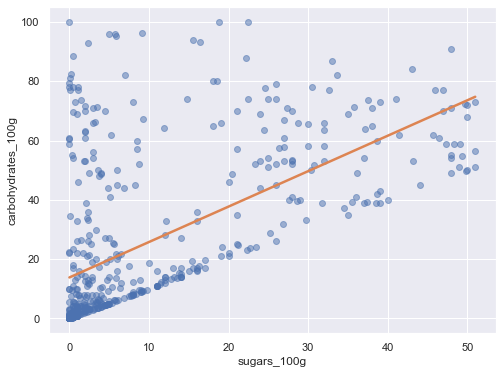

                            OLS Regression Results                            
Dep. Variable:       energy-kcal_100g   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           2.33e-35
Time:                        20:48:28   Log-Likelihood:                -3240.3
No. Observations:                 500   AIC:                             6485.
Df Residuals:                     498   BIC:                             6493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
saturated-fat_100g    19.1621      1

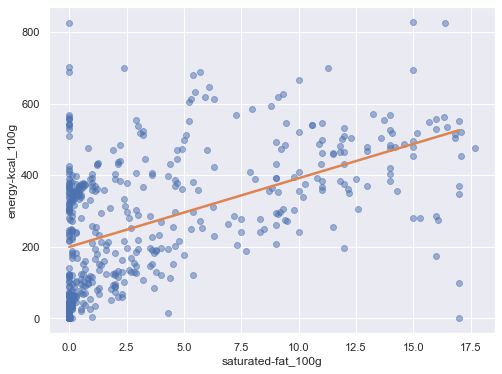

                            OLS Regression Results                            
Dep. Variable:       energy-kcal_100g   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     170.2
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           1.12e-33
Time:                        20:48:29   Log-Likelihood:                -3242.6
No. Observations:                 500   AIC:                             6489.
Df Residuals:                     498   BIC:                             6498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
carbohydrates_100g     3.3106      0

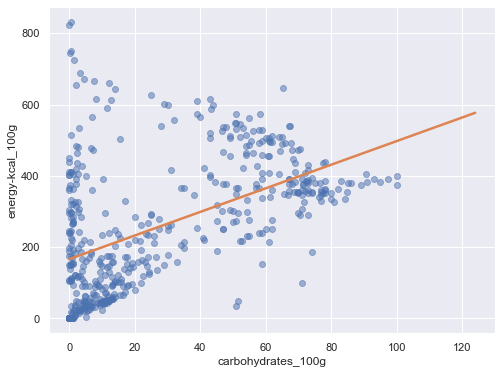

                            OLS Regression Results                            
Dep. Variable:          proteins_100g   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           3.24e-24
Time:                        20:48:29   Log-Likelihood:                -1617.7
No. Observations:                 500   AIC:                             3239.
Df Residuals:                     498   BIC:                             3248.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
salt_100g      4.3570      0.407     10.707      0.0

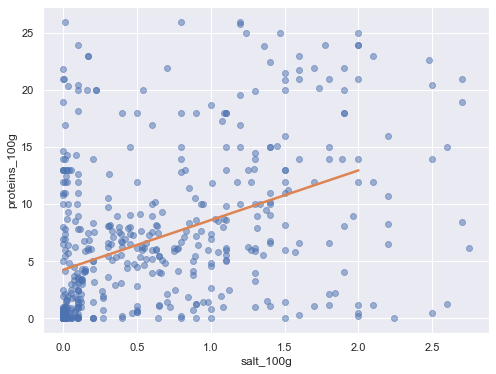

                            OLS Regression Results                            
Dep. Variable:       energy-kcal_100g   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     76.73
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           3.08e-17
Time:                        20:48:29   Log-Likelihood:                -3272.8
No. Observations:                 500   AIC:                             6550.
Df Residuals:                     498   BIC:                             6558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sugars_100g     4.8516      0.554      8.759      

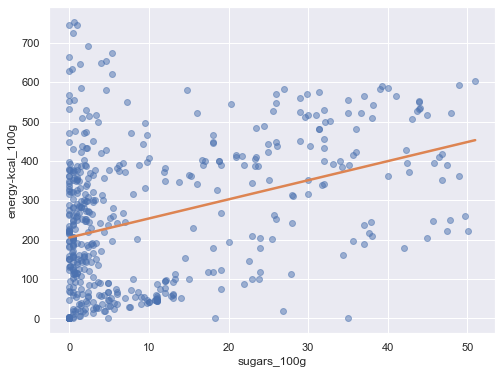

                            OLS Regression Results                            
Dep. Variable:          proteins_100g   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     54.46
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           6.70e-13
Time:                        20:48:30   Log-Likelihood:                -1597.4
No. Observations:                 500   AIC:                             3199.
Df Residuals:                     498   BIC:                             3207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fat_100g       0.1541      0.021      7.380      0.0

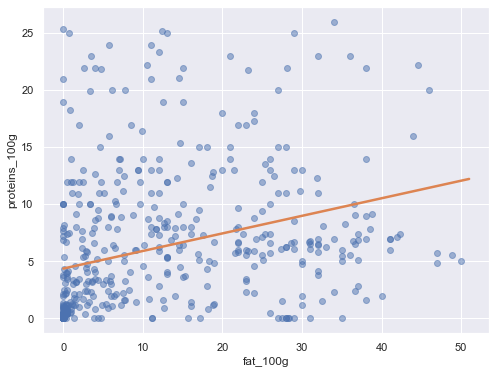

                            OLS Regression Results                            
Dep. Variable:            sugars_100g   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     53.92
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           8.56e-13
Time:                        20:48:30   Log-Likelihood:                -1981.0
No. Observations:                 500   AIC:                             3966.
Df Residuals:                     498   BIC:                             3974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
salt_100g     -6.4488      0.878     -7.343      0.0

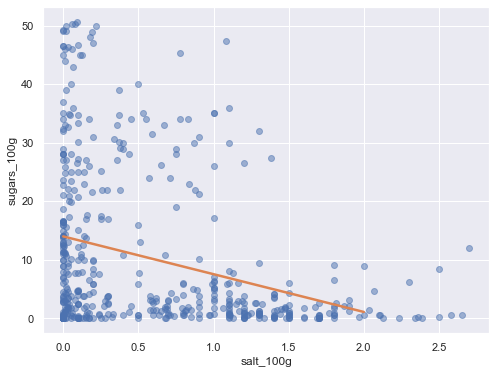

                            OLS Regression Results                            
Dep. Variable:               fat_100g   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     48.81
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           9.09e-12
Time:                        20:48:31   Log-Likelihood:                -1940.8
No. Observations:                 500   AIC:                             3886.
Df Residuals:                     498   BIC:                             3894.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
salt_100g      5.1744      0.741      6.986      0.0

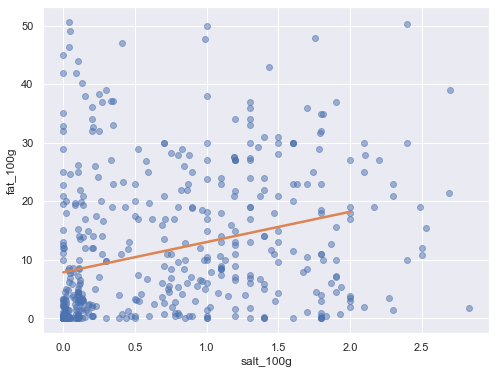

In [18]:
i = 0
for i in range(10):

    #
    df_pair = df_products_cleaning[list(list_pairs.index[i])].dropna(axis='index', how='any')

    #linear_regression_function(df_pair.sample(500), 'carbohydrates_100g', 'sugars_100g', df_pair['carbohydrates_100g'].max())

    linear_regression_function(df_pair.sample(500), list_pairs.index[i][1], list_pairs.index[i][0], df_pair[list_pairs.index[i][1]].max())
    i = i +1


#### General

### ANOVA

In [19]:
# We would like to assess the hypotehsis that products with NaN nutriscore are comparable to products with C, D and E nutriscores 
# (H0): There are no differences between c,d,e and NaN categories 

<AxesSubplot:>

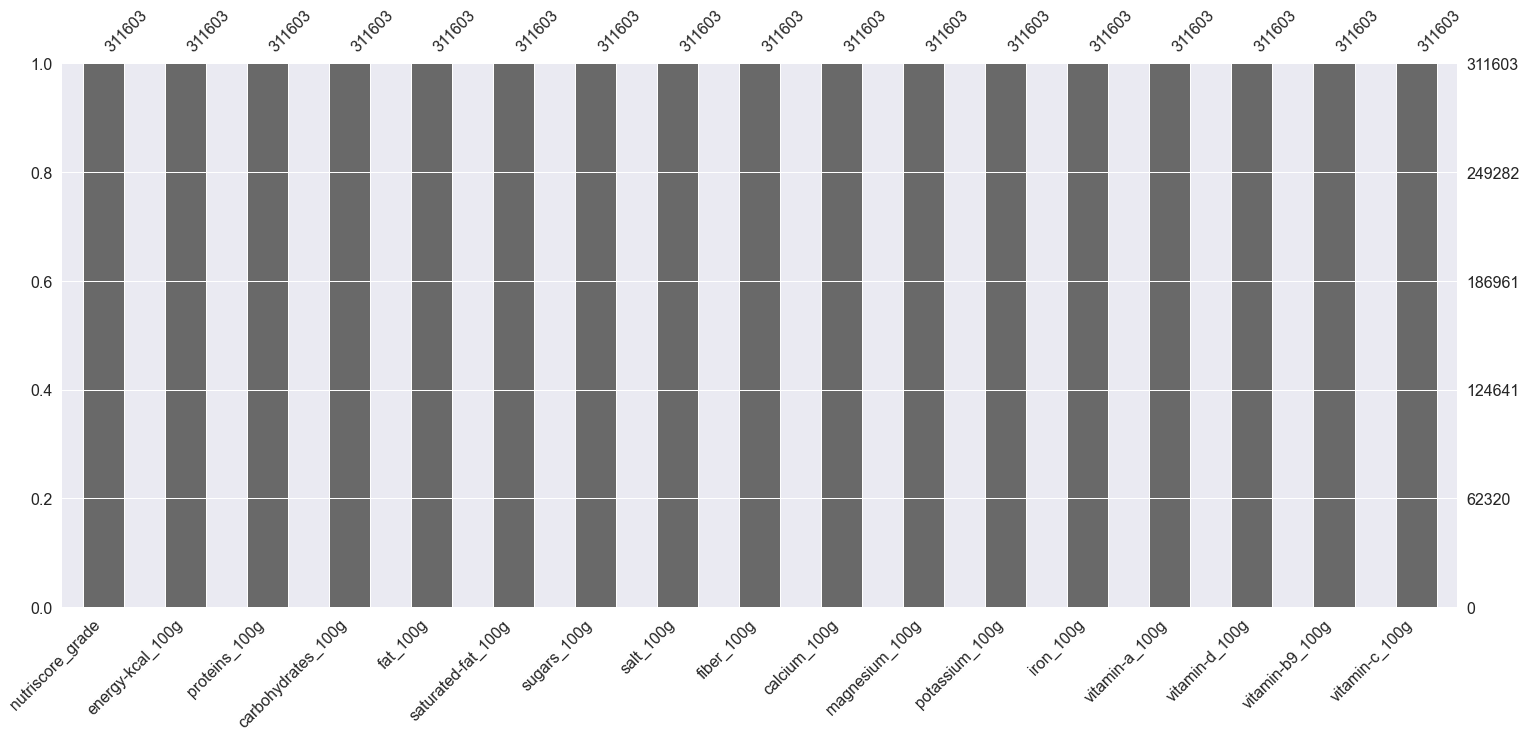

In [20]:
# Prepare dataframe for next plot
df_products_anova = df_products_cleaning.copy()

# Prepare dataframe for next plot
df_products_anova = df_products_anova.reset_index(["nutriscore_grade"])

# Show
msno.bar(df_products_anova)

In [21]:
# Import .csv file and convert into a pandas dataframe
df_iterative_imputer_graph = pd.read_csv("df_iterative_imputer_graph.csv", sep=",", encoding="utf-8", low_memory=False)

# Restructuring dataframe index with non-numerical variables
df_iterative_imputer_graph.set_index(['code','product_name','brands','countries'], inplace = True)

# Show
df_iterative_imputer_graph.head()


,,,,saturated-fat_100g,carbohydrates_100g,salt_100g,nutriscore_grade,energy-kcal_100g,sugars_100g,fat_100g,proteins_100g
code,product_name,brands,countries,,,,,,,,
0000000001199,Solène céréales poulet,CROUS,France,0.5,30.3,0.464,NAN,219.0,1.7,5.9,9.7
0000000001281,Tarte noix de coco,"Crous Resto',Crous",France,15.5,27.3,0.100,D,381.0,21.9,22.0,4.6
0000000001663,Crème dessert chocolat,Ferme De La Frémondière,France,0.0,0.0,0.000,NAN,0.0,0.0,0.0,0.0
0000000001885,Compote de poire,Crous,France,0.0,36.0,0.000,A,157.0,27.0,0.0,0.6
0000000002264,Baguette Poitevin,Crous resto,France,3.8,27.5,0.400,NAN,207.0,0.6,6.7,8.9


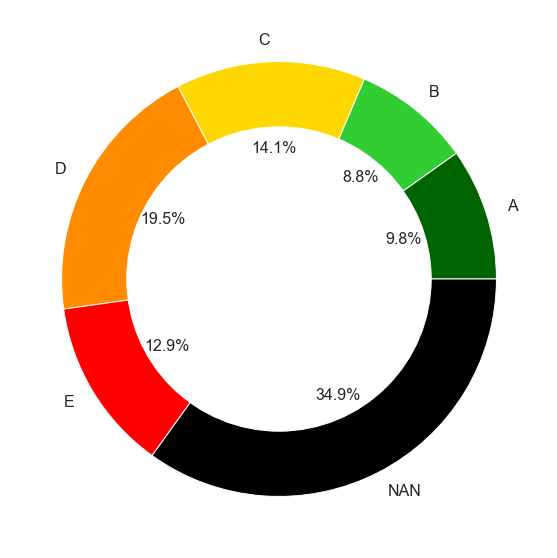

In [22]:
# Subplot
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('white')

# Plot
pie = df_iterative_imputer_graph.groupby('nutriscore_grade').size()
pie.plot(kind = "pie",          
         #title = "Prodcuts nutriscore grade repartition - France",
         xlabel = "",
         ylabel= "",
         autopct = '%1.1f%%',
         colors = ["darkgreen","limegreen","gold","darkorange","red","black"],
         textprops={'fontsize': 16},
         ax = ax)

# Adding white circle for styling purposes
my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

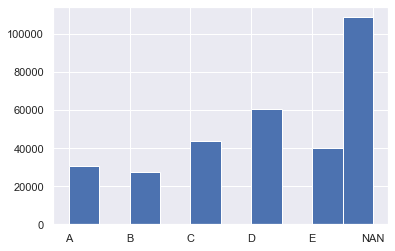

In [23]:
#
plt.hist(df_iterative_imputer_graph['nutriscore_grade'].sort_values(kind='quicksort'))
plt.show() 


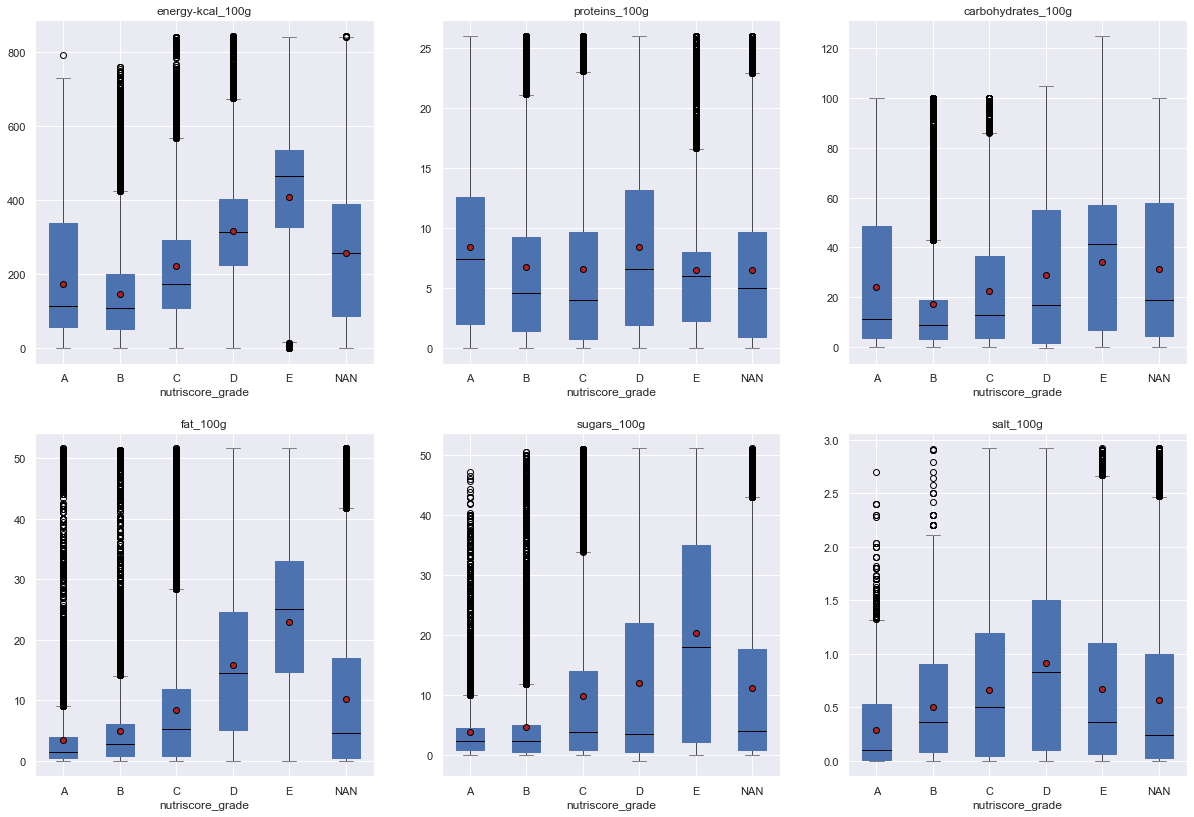

In [24]:
# Parameters   
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
props = dict(boxes="b", medians="DarkBlue", caps="Gray")

fig, ax_new = plt.subplots(2,3,figsize=(20,14))

#Create a boxplot
df_iterative_imputer_graph.boxplot(['energy-kcal_100g',
                          'proteins_100g',
                          'carbohydrates_100g',
                          'fat_100g',
                          'sugars_100g',
                          'salt_100g',
                          ],
                          by='nutriscore_grade',               
                          figsize=(12, 8),
                          showfliers = True, 
                          medianprops = medianprops, 
                          vert = True, 
                          color=props,
                          patch_artist = True,                            
                          showmeans = True, 
                          meanprops = meanprops,
                          ax=ax_new
                        )

plt.suptitle("")
plt.show()

In [25]:
#
df_products_anova = df_iterative_imputer_graph.copy()
df_products_anova.head()

,,,,saturated-fat_100g,carbohydrates_100g,salt_100g,nutriscore_grade,energy-kcal_100g,sugars_100g,fat_100g,proteins_100g
code,product_name,brands,countries,,,,,,,,
0000000001199,Solène céréales poulet,CROUS,France,0.5,30.3,0.464,NAN,219.0,1.7,5.9,9.7
0000000001281,Tarte noix de coco,"Crous Resto',Crous",France,15.5,27.3,0.100,D,381.0,21.9,22.0,4.6
0000000001663,Crème dessert chocolat,Ferme De La Frémondière,France,0.0,0.0,0.000,NAN,0.0,0.0,0.0,0.0
0000000001885,Compote de poire,Crous,France,0.0,36.0,0.000,A,157.0,27.0,0.0,0.6
0000000002264,Baguette Poitevin,Crous resto,France,3.8,27.5,0.400,NAN,207.0,0.6,6.7,8.9


In [26]:
df_products_anova_a = df_products_anova[df_products_anova['nutriscore_grade'] == 'A'].copy()
df_products_anova_b = df_products_anova[df_products_anova['nutriscore_grade'] == 'B'].copy()
df_products_anova_c = df_products_anova[df_products_anova['nutriscore_grade'] == 'C'].copy()
df_products_anova_d = df_products_anova[df_products_anova['nutriscore_grade'] == 'D'].copy()
df_products_anova_e = df_products_anova[df_products_anova['nutriscore_grade'] == 'E'].copy()
df_products_anova_nan = df_products_anova[df_products_anova['nutriscore_grade'] == 'NAN'].copy()

df_products_anova_a.set_index("nutriscore_grade", inplace=True)
df_products_anova_b.set_index("nutriscore_grade", inplace=True)
df_products_anova_c.set_index("nutriscore_grade", inplace=True)
df_products_anova_d.set_index("nutriscore_grade", inplace=True)
df_products_anova_e.set_index("nutriscore_grade", inplace=True)
df_products_anova_nan.set_index("nutriscore_grade", inplace=True)

df_products_anova_a

,saturated-fat_100g,carbohydrates_100g,salt_100g,energy-kcal_100g,sugars_100g,fat_100g,proteins_100g
nutriscore_grade,,,,,,,
A,0.0,36.0,0.000,157.0,27.0,0.0,0.600000
A,0.5,25.2,0.358,160.0,0.6,2.2,9.500000
A,1.4,0.0,0.100,168.0,0.0,10.3,18.900000
A,0.0,4.8,0.000,32.0,4.5,0.1,1.400000
A,0.4,4.8,0.700,51.0,4.0,2.3,1.700000
...,...,...,...,...,...,...,...
A,0.2,74.6,0.140,345.0,0.5,1.2,8.500000
A,0.0,12.0,0.100,76.0,11.7,0.0,7.100000
A,0.0,4.0,0.070,35.0,0.0,1.0,2.000000


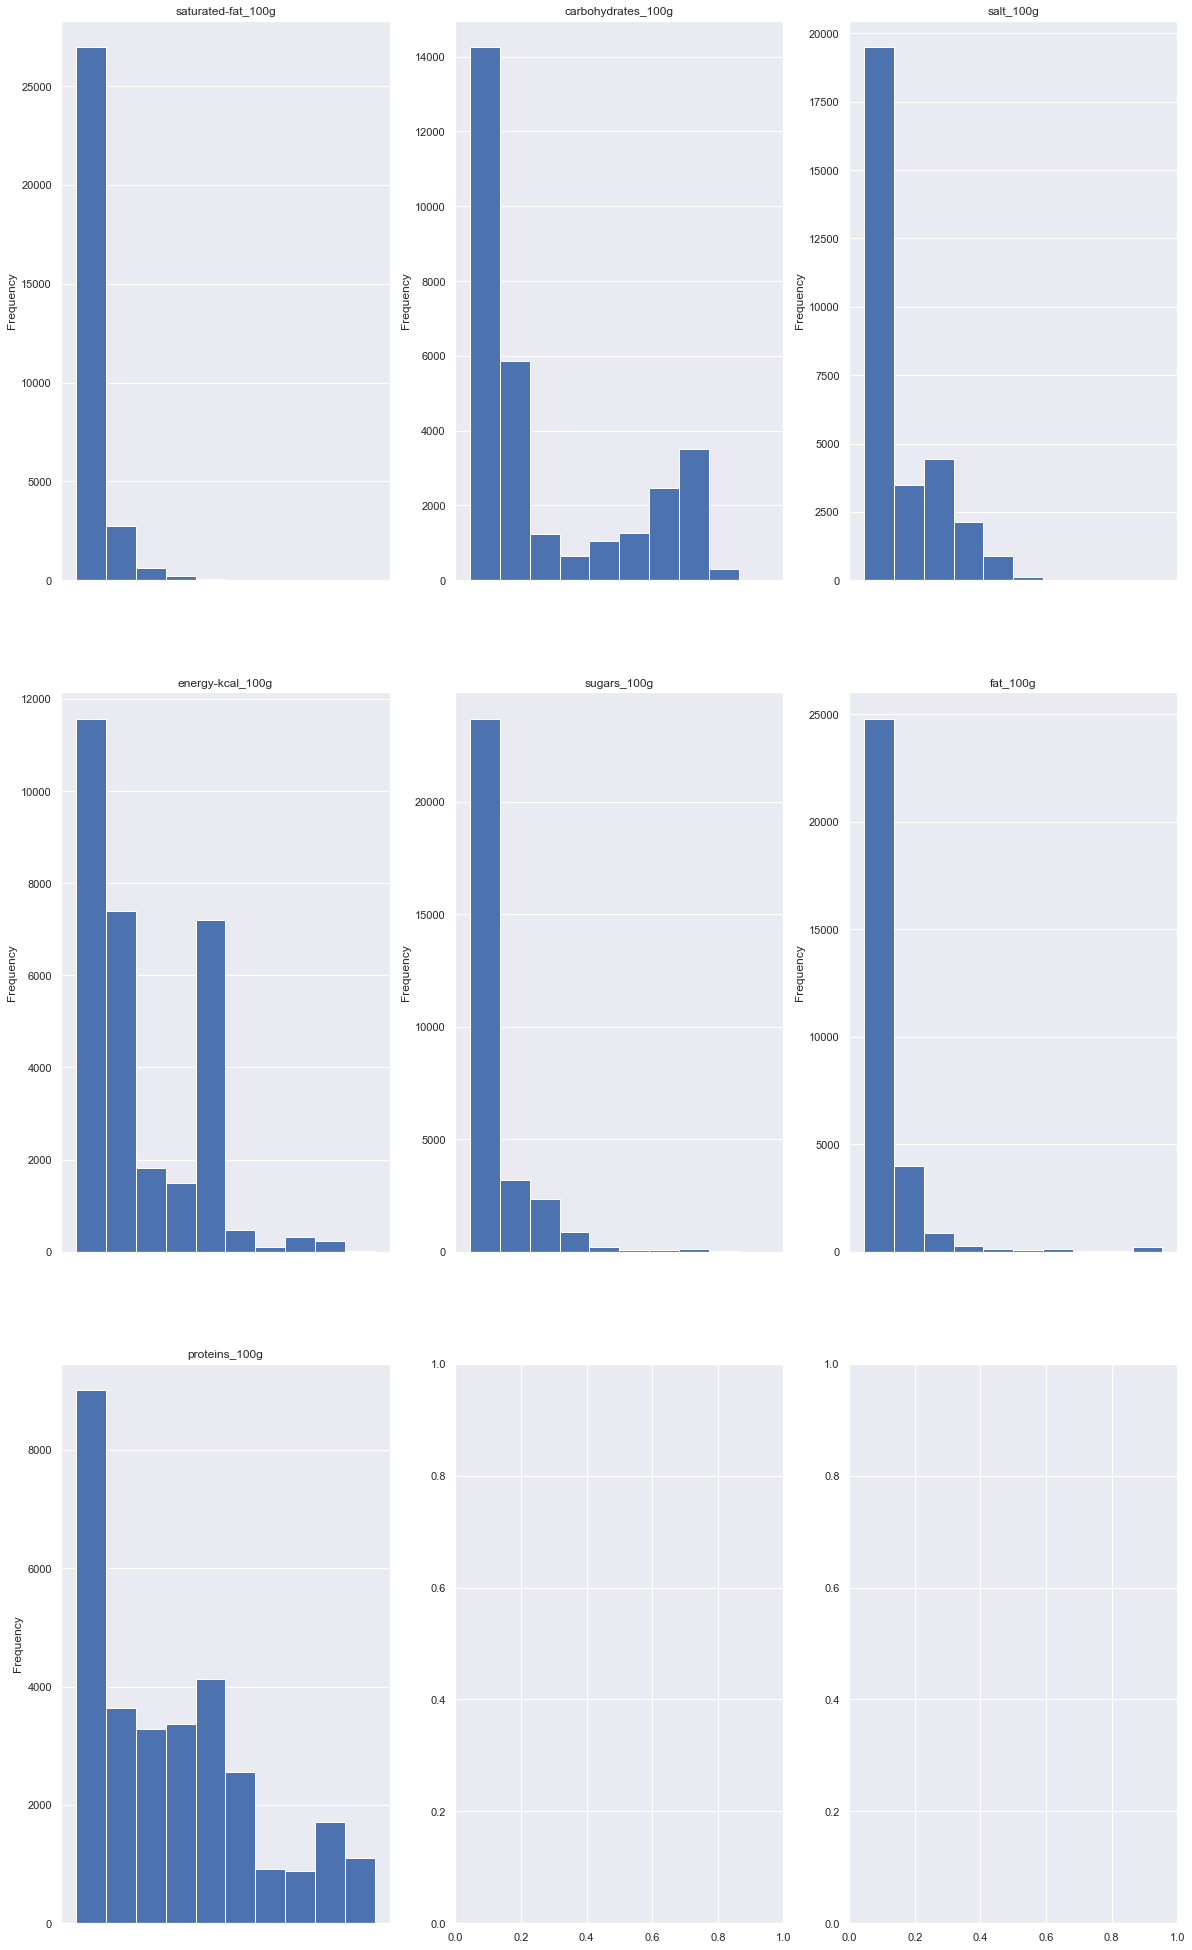

In [27]:
# Checking the normal distribution of each group
plot_grid(3,3,df_products_anova_a,"hist")

In [28]:
list_features_treatments = ['energy-kcal_100g', 
                            'proteins_100g', 
                            'carbohydrates_100g', 
                            'fat_100g', 
                            'saturated-fat_100g', 
                            'sugars_100g', 
                            'salt_100g']
fitted_lambda = dict()

#
df_products_anova_a_one_way_normalize = (df_products_anova_a[df_products_anova_a>0]).copy()

# Normalizing our variables with Box Cox transformation

for var in list_features_treatments:
    df_products_anova_a_one_way_normalize[var],fitted_lambda = stats.boxcox(df_products_anova_a_one_way_normalize[var])


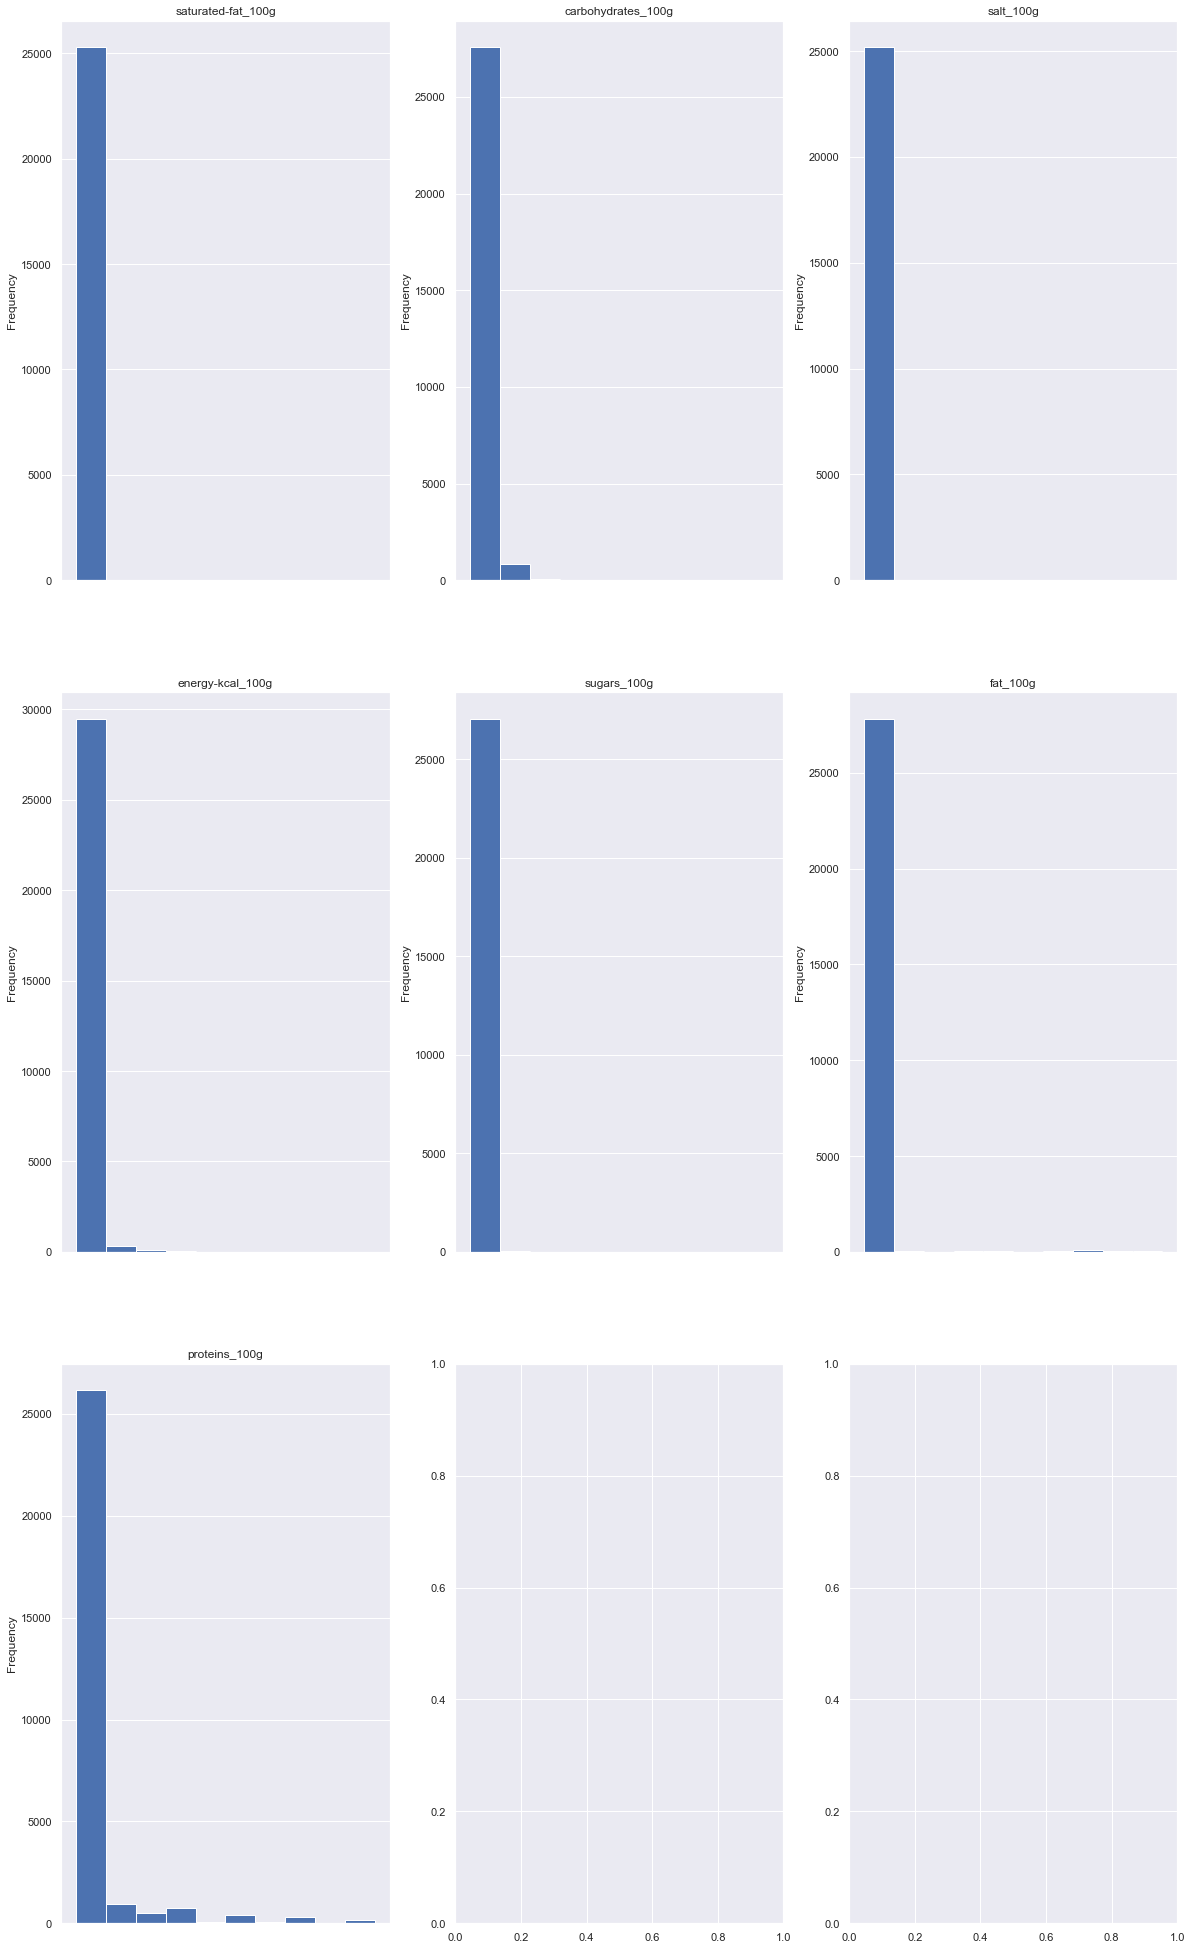

In [29]:
# Checking the normal distribution of each group
plot_grid(3,3,df_products_anova_a_one_way_normalize,"hist")

# Boxcox results(anova_one_way_normalize) are worse than before nomralization so we will keep anova_one_way data 

#### Prerequisites test

##### Normal Distribution Assumption check

In [30]:
# MShapiro Wilk test
# (H0): Normal Distribution of groups

for var in list_features_treatments:
    print(var + ": \n" + str(stats.shapiro(df_products_anova[var])) + "\n")
                        
# p-value is > 0.05  
# Variables do follow a Normal Distribution

energy-kcal_100g: 
ShapiroResult(statistic=nan, pvalue=1.0)

proteins_100g: 
ShapiroResult(statistic=nan, pvalue=1.0)

carbohydrates_100g: 
ShapiroResult(statistic=nan, pvalue=1.0)

fat_100g: 
ShapiroResult(statistic=nan, pvalue=1.0)

saturated-fat_100g: 
ShapiroResult(statistic=nan, pvalue=1.0)

sugars_100g: 
ShapiroResult(statistic=nan, pvalue=1.0)

salt_100g: 
ShapiroResult(statistic=nan, pvalue=1.0)



##### Homogeneity of Variance Assumption check

In [31]:
# Bartlett method
stats.bartlett(df_products_anova['energy-kcal_100g'],
                 df_products_anova['proteins_100g'],
                 df_products_anova['carbohydrates_100g'],	
                 df_products_anova['fat_100g'],
                 df_products_anova['saturated-fat_100g'],
                 df_products_anova['sugars_100g'],
                 df_products_anova['salt_100g']
                )
# (H0) hypothesis is rejected  (p < 0.05)
# Input samples are from populations with different variances

BartlettResult(statistic=8061257.085466535, pvalue=0.0)

In [32]:
# Our prerequistes are partially satisfied(normality) to proceed to an ANOVA test 
# The test will likely be biased however because of the non homogeneity

#### One-way ANOVA tests

In [33]:
# (H0): there are no differences among the dfferents categories
F, p = stats.f_oneway(df_products_anova_a.dropna(),
                      df_products_anova_b.dropna(),
                      df_products_anova_c.dropna(),
                      df_products_anova_d.dropna(),
                      df_products_anova_e.dropna(),
                      df_products_anova_nan.dropna()
                     )

# p-value < 0.05
#The (H0) hypothesis is rejected we conclude that the means are not equal from each another
print("F-value:\n " + str(F) +"\n\n","p-value:\n " + str(p))

F-value:
 [19529.26881939  2355.94258978  4342.25805418 10263.26151638
  8333.70563002 13910.24059659   988.48017213]

 p-value:
 [0. 0. 0. 0. 0. 0. 0.]


#### Ad_hoc tests

##### Difference among groups analysis

In [34]:
# Rename variables with dash for tuckey tests
df_products_anova_2_tuckey = df_products_anova.copy()
df_products_anova_2_tuckey.rename(columns={'energy-kcal_100g':'energy_kcal_100g','saturated-fat_100g':'saturated_fat_100g'}, inplace=True)

In [35]:
# energy_kcal_100g
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test

list_features_tuckey = ['energy_kcal_100g', 
                            'proteins_100g', 
                            'carbohydrates_100g', 
                            'fat_100g', 
                            'saturated_fat_100g', 
                            'sugars_100g', 
                            'salt_100g']

res = stat()

for var in list_features_tuckey:
    res.tukey_hsd(df=df_products_anova_2_tuckey, res_var=var, xfac_var='nutriscore_grade', anova_model = str(var) + ' ~ C(nutriscore_grade)')
    print(var + "\n" + str(res.tukey_summary) + "\n")
    
# Validated (H0) hypothesis for proteins_100g: NAN-E, E-B, E-C, B-C (similar means)
# Rejected (H0) hypothesis for other cases (p <0.05) (different means)

energy_kcal_100g
   group1 group2        Diff       Lower       Upper     q-value  p-value
0     NAN      D   60.690119   58.327588   63.052650  103.527161    0.001
1     NAN      A   78.516552   75.590239   81.442865  108.131999    0.001
2     NAN      E  137.848609  135.046950  140.650267  198.290103    0.001
3     NAN      B  104.217310  101.158667  107.275952  137.317219    0.001
4     NAN      C   31.144659   28.553977   33.735341   48.448834    0.001
5       D      A  139.206672  136.025216  142.388127  176.338841    0.001
6       D      E   77.158489   74.091302   80.225677  101.381139    0.001
7       D      B  164.907429  161.603849  168.211010  201.172749    0.001
8       D      C   91.834778   88.959021   94.710536  128.697074    0.001
9       A      E  216.365161  212.845303  219.885018  247.728548    0.001
10      A      B   25.700758   21.973104   29.428411   27.785883    0.001
11      A      C   47.371893   44.017532   50.726254   56.914734    0.001
12      E      B  242

## 3. Multivariate analysis

### Plot 1 - barh

In [36]:
#
df_products_cleaning.reset_index("nutriscore_grade", inplace=True)

# Select columns of concern for next plot
df = df_products_cleaning[["proteins_100g", 
                           "carbohydrates_100g", 
                           "fat_100g", 
                           "sugars_100g", 
                           "salt_100g", 
                           "fiber_100g",
                           "nutriscore_grade"]].copy()

# Restrict dataframe to fully filled rows
df.dropna(how = "any", axis = 0, inplace = True)

# Create dataframe with each value corresponding to its share among all nutrients for each given product and compute mean of each nutrient share for all products
df1 = df.loc[ : , df.columns!= "nutriscore_grade"].apply(lambda x: x*100/sum(x), axis = 1)

# Append non-numerical to new dataframe
df1["nutriscore_grade"] = df["nutriscore_grade"]

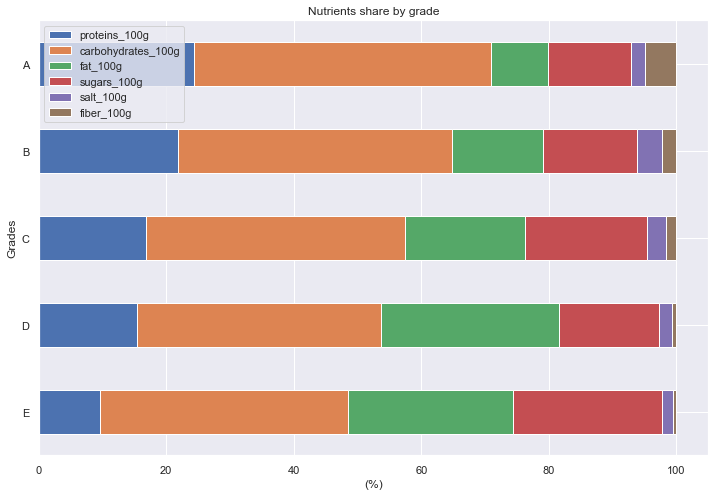

In [37]:
# Plot stacked nutrients share for given nutriscore grade
df1.groupby("nutriscore_grade").mean().plot(kind = "barh", width= 0.5, stacked = True, sort_columns = 1, figsize=(12,8))

# Features
plt.title("Nutrients share by grade")
plt.xlabel("(%)")
plt.ylabel("Grades")

# Show
plt.gca().invert_yaxis()
plt.show()

### Plot 2 - Descriptive analysis : Principal components analysis (PCA)

In [38]:
# Create dataframe for PCA
df_products_clean = df_products_cleaning.copy(deep=True)

# Drop nn-numerical column
df_products_clean = df_products_clean.drop(columns=["nutriscore_grade"])

# Fill missing values with 0
df_products_clean.fillna(0, inplace = True)

# Show
df_products_clean.head()

,,,,energy-kcal_100g,proteins_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,fiber_100g,calcium_100g,magnesium_100g,potassium_100g,iron_100g,vitamin-a_100g,vitamin-d_100g,vitamin-b9_100g,vitamin-c_100g
code,product_name,brands,countries,,,,,,,,,,,,,,,,
0000000001199,Solène céréales poulet,CROUS,France,219.0,9.7,30.3,5.9,0.5,1.7,0.464,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000001281,Tarte noix de coco,"Crous Resto',Crous",France,381.0,4.6,27.3,22.0,15.5,21.9,0.100,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000001663,Crème dessert chocolat,Ferme De La Frémondière,France,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000001885,Compote de poire,Crous,France,157.0,0.6,36.0,0.0,0.0,27.0,0.000,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000002264,Baguette Poitevin,Crous resto,France,207.0,8.9,27.5,6.7,3.8,0.6,0.400,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Selection of columns of cocnenr for next PCA 
# df_products_filtered_pca = df_products_clean[["energy-kcal_100g", "proteins_100g", "carbohydrates_100g", "fat_100g", "sugars_100g", "salt_100g"]].copy(deep=True)
# df_products_filtered_pca

In [40]:
columns = ["energy-kcal_100g", 
           "proteins_100g",
           "carbohydrates_100g", 
           "fat_100g", 
           "sugars_100g",
           "salt_100g"]

df_products_filtered_pca = df_products_clean[columns].sample(500)
df_products_filtered_pca

,,,,energy-kcal_100g,proteins_100g,carbohydrates_100g,fat_100g,sugars_100g,salt_100g
code,product_name,brands,countries,,,,,,
2253069021327,Piémontaise au jambon,Le Porc Francais,France,177.0,4.100000,7.90,14.0,0.800000,1.10
2255111035092,2 cuisses de poulet direct au four curry,Le Gaulois,en:france,197.0,17.000000,3.00,13.0,0.900000,1.10
323604,Chicken arrabbiata with spiralized vegetables,M&S,"France,United Kingdom",229.0,25.000000,14.40,5.9,12.200000,1.68
25583007284,Tofurky Chick'n & Apple Meat Free Sausages,Tofurky,France,262.0,21.966667,8.00,12.0,4.000000,1.50
0012000151262,Crystal Pepsi,Pepsi,France,250.0,0.000000,69.00,0.0,45.166667,0.09
...,...,...,...,...,...,...,...,...,...
3372900901365,Liegeois au chocolat,Marie Morin,France,274.0,4.800000,18.00,20.0,17.000000,0.06
3858884090306,Pumpkin seed oil,Gardenolo,France,0.0,0.040000,0.00,0.0,0.000000,0.04
2871753014822,Terrine de campagne à l'ancienne,U Saveurs,France,325.0,13.330000,3.53,28.6,1.950000,1.40


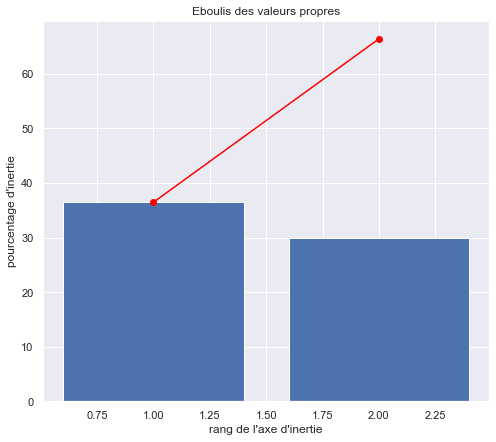

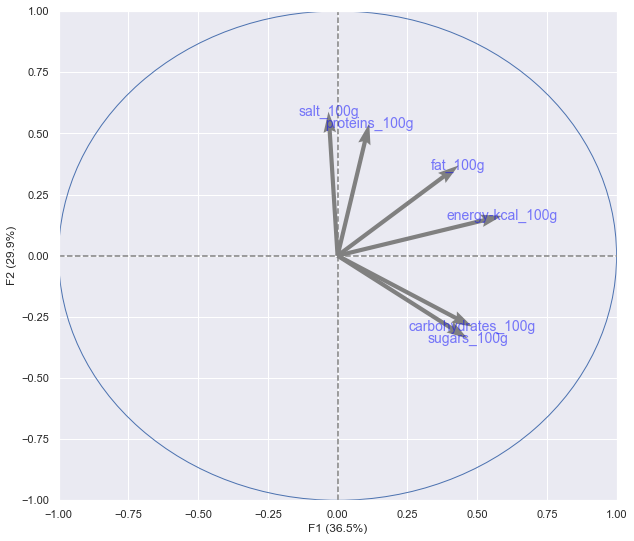

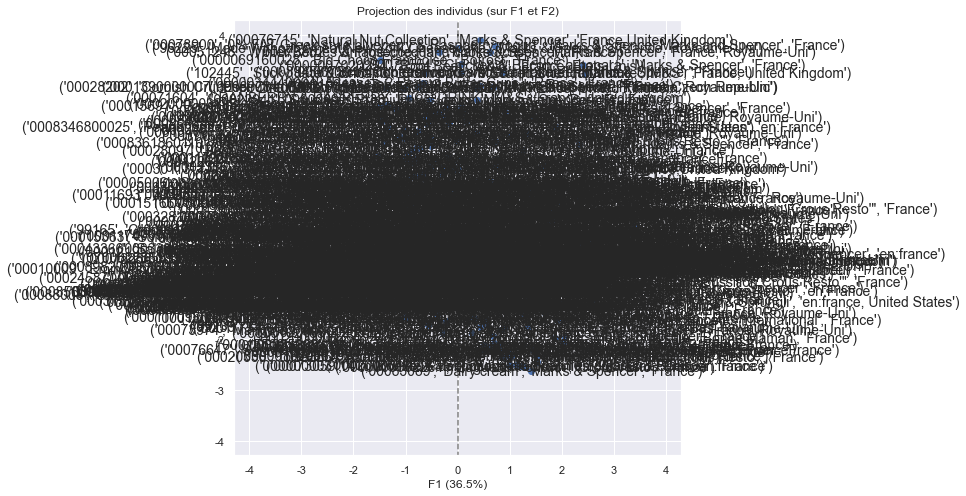

In [41]:
# Number of components to compute
n_comp = 2

# Preparing data for ACP
df_products_filtered_pca = df_products_filtered_pca.fillna(df_products_filtered_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_products_filtered_pca.values
names = df_products_clean.index # ou data.index pour avoir les intitulés
features = df_products_filtered_pca.columns

# Mean centering and dimensionality reduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Principal components computation
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Screen plot of eigenvalues
display_scree_plot(pca)

# Unity circle of correlations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Individuals projection
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
plt.show()

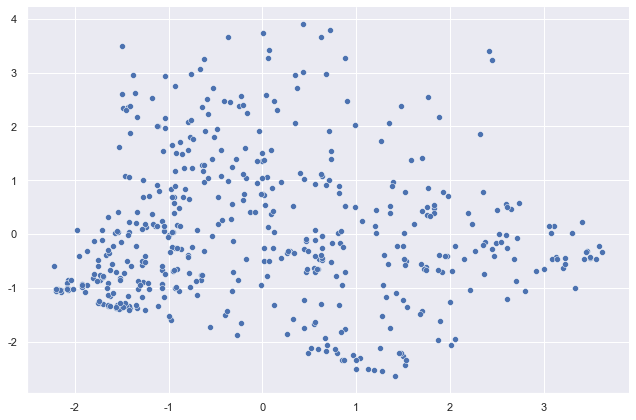

In [42]:
#
pca.explained_variance_ratio_

#
principalComponents = pca.transform(X_scaled)

# Seaborn plot (sample 500)
sns.relplot(kind="scatter", x=principalComponents[:, 0], y=principalComponents[:, 1],
            height=6, aspect=1.5,);